In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Goal:</font><br>Brief Introduction to Nonlinear Support Vector Machine Classification in Python<br></h1></center>
</div>

In [2]:
# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()

# Math libraries
import numpy as np

# Data visualization module
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import seaborn as sns

# SVM and Other Key ML modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Post Overview.</font></h1></center>
    <ol>
        <li><a href="#objective1">Introduction to Nonlinear Suppor Vector Machine (SVM) Classification.</a></li><br>
        <li><a href="#objective2">Introduction to Polynomial Features in SVM Classification.</a></li><br>        
        <li><a href="#objective3">Demonstrate how to carry out Nonlinear SVM classification using <code>PolynomialFeatures</code> and <code>LinearSVC</code> with the <code>make_moons</code> dataset.</a></li><br>
        <li><a href="#objective4">Demonstrate how to carry out Nonlinear SVM classification using <code>PolynomialFeatures</code> and <code>LinearSVC</code> with nfl player data.</a></li><br> 
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Introduction to Nonlinear Suppor Vector Machine (SVM) Classification</font></h1></center>
    <hr>
    <ul><h4></h4>
        <li>Support Vector Machine algorithm is a powerful supervised Machine Learning Models capable of performing
            <ul>
        <li>Linear classification</li>
        <li><font color="red">Nonlinear classification</font></li>
        <li>Regression</li>
        <li>Outlier detection</li>
            </ul>
        </li><br>
        <li>SVM is one of the most popular machine learning models and is well suited for classification of complex datasets that are small and medium sized.</li><br>
        <li>Like logistic regression, support vector machines were designed for binary classification and do not natively support classification tasks with more than two classes.</li><br>
        <li>There is a way to carry out multi-classification problems using binary classification algorithms, but that requires the data be split into multiple binary classification datasets and then fit to a binary classification model.</li><br>
        <li>In this algorithm, data is plotted in n-dimensional space (where n is number of features you have). Then, we perform classification by finding a decision boundary (aka hyperplane in 3d+) that best differentiates the two classes.</li><br>     
        <li><mark style="background-color: yellow;">The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.</mark></li><br>
        <li>Decision boundaries are used in SVM to help sort data into categories for classification.</li><br>     
        <li>Although linear SVM classification is generally efficient and works in many cases, most datasets are not linearly separable.</li><br>
        <li>Nonlinear SVM classification are methods used to work with nonlinear data and includes:
            <ul>
                <li>Polynomial Features</li>
                <li>Polynomial Kernel</li>
                <li>Similarity Features</li>
                <li>Gaussian RBF Kernel</li>  
            </ul>
            </li><br>
        <li>SVM is popular because of the Kernel function in particular, because these help solve nonlinearity, especially for complex datasets.</li><br>        
        <li>The method used to handle nonlinearity depends on the size of the dataset, it's complexity, and the computational resources available.</li><br>
        <li><font color="red">This post will focus on Nonlinear SVM Classification using polynomial features.</font></li><br>
    </ul>
    <hr>
<center><h1><font color="blue">The Goal of this post is to demonstrate how to handle Nonlinear SVM classification using Polynomial Features.</font></h1></center>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Introduction to Polynomial Features in SVM Classification</font></h1></center>
    <hr>
    <ul><h4></h4>
        <li>One method to handle nonlinear dataset is to add more features, with the hope that it helps make the data linearly separable.</li><br>
        <li>Consider <a href="#example1">Example 1</a>:<br>
            <ul><strong>Left plot: Not Linearly Separable (before transformation)</strong>
                <li>This dataset contains two classes (blue squares and green triangles).</li>
                <li>Both classes have the same range (same y-value)</li>
                <li>The green triangle class data is nested within the blue squares along the domain (x-values)</li>
                <li>Because of these two conditions, the data is not linearly seperable. You cannot draw a straight line that would segregate the blue squares from the green triangles.</li>
                <li>To overcome this, you can mathematically transform the data, as explained in the next plot.</li>  
            </ul><br>
            <ul><strong>Right plot: Linearly Separable (after transformation)</strong>
                <li>This dataset contains two classes (blue squares and green triangles).</li>
                <li>The classes no longer have the same range (same y-value), nor do they have the same domain (x-values).</li>
                <li>The range for the green triangle class data is below 4, while the range for the blue square data is over 8.</li>
                <li>Because of these two conditions, you can draw a line (red dash line) that would separate both groups.</li>               
            </ul>            
        </li><br>
        <li><strong>How was this accomplished?</strong>
            <ul><strong>Using Polynomial Features:</strong>
                <li>Is a method to create new features by raising an existing features to an exponent.</li>
                <li>In example 1 (left plot), we had an array of data that all had a non zero interger for the x value.<code></code></li>
                <li>The best way to separate this dataset is by transforming (remapping) the y dimension.</li>
                <li>This was accomplished by raising the <strong>x</strong> to <strong>x<sup style="vertical-align: sup; font-size: smaller;">2</sup></strong> and assigning this data to the y array, as described in <a href="#notation1">notation 1</a></li>
                <li>This remapping works in this example, and we can now perfectly separate the data using a line, as depicted with the red dash line in the right plot of example 1.</li>
                <li><a href="#image1">Image 1</a> summarizes what we accomplished in this step. The next step is to use <code>LinearSVC()</code> to draw a hyperplane between the segregated data, and maximize the margin between the two hyperplanes, this will reduce misclassification of new data.</li>
            </ul>
        </li><br>        
        <li>The explanation provided in this example takes a reductionist approach, but covers the principles. behind this method. This does not always work with complex datasets, but is an introduction to a basic method for dealing with nonlinear data.</li><br>
        <li>The following sections will explain Sklearn <code>PolynomialFeatures()</code> class and <code>LinearSVC()</code></li><br>
        <li>Two datasets will be used to illustrate how these methods can be used. The first is via a standard dataset available via sklearn, and the second is a dataset I extracted from an API call, representing 2020-2021 NFL player data.</li><br>        
    </ul>
    <hr>
        <ul><h4>Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">PolynomialFeatures</a> Explained</h4><br>
        <li><strong><code>PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')</code></strong><br><br>
            <ul><strong>Parameters:</strong>
                <li><strong><code>degree (int, default=2)</code></strong>: The degree of the polynomial features.</li>
                <li><strong><code>interaction_only (bool, default=False)</code></strong>: If true, only interaction features are produced: features that are products of at most degree distinct input features </li>
                <li><strong><code>include_bias (bool, default=True)</code></strong>: If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).</li>
                <li><strong><code>order ({‘C’, ‘F’}, default=’C’)</code></strong>: Order of output array in the dense case. ‘F’ order is faster to compute, but may slow down subsequent estimators.</li>             
            </ul>
            <hr><br>
            <ul><strong>Attributes:</strong>
                <li><strong><code>powers_n (darray of shape (n_output_features, n_input_features))</code></strong>: powers_[i, j] is the exponent of the jth input in the ith output.</li>
                <li><strong><code>n_input_features_ (int)</code></strong>: The total number of input features.</li>
                <li><strong><code>n_output_features_ (int)</code></strong>: The total number of polynomial output features. The number of output features is computed by iterating over all suitably sized combinations of input features.</li>
            </ul>
            </li>
    </ul>
    <hr>
    <ul><h4>Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a> Explained</h4><br>       
        <li><code>class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)</code><br>
        <ul><strong>Parameters Explained:</strong>
                <li><strong><code>C, default=1.0</code></strong>: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.</li>
                <li><strong><code>loss{‘hinge’, ‘squared_hinge’}, default=’squared_hinge’</code></strong>: Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported. In our example, we are using the hinge loss function.</li>
                <li><strong><code>random_state</code></strong>: Controls the pseudo random number generation for shuffling the data for the dual coordinate descent (if dual=True). When dual=False the underlying implementation of LinearSVC is not random and random_state has no effect on the results. Pass an int for reproducible output across multiple function calls. We are using the integer 42.</li>
                <li><strong><code>max_iterint, default=1000</code></strong>: The maximum number of iterations to be run. In some cases you need to run more than the default.</li>
            </ul>
        </li><br>
    </ul>
</div>

<div id="example1"><strong>Example 1</strong>
</div>

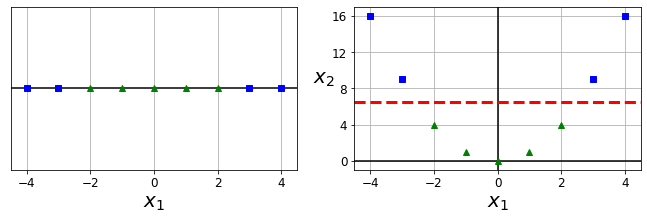

In [3]:
# Creates the x array for data
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# Transforms x data via (polynomial features) x2
X2D = np.c_[X1D, X1D**2] # saves new data into a 2d numpy array (x, x^2)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

# left plot
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20) 
plt.axis([-4.5, 4.5, -0.2, 0.2])

# right plot
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

<div id="notation1"><strong>Notation 1</strong>
</div>

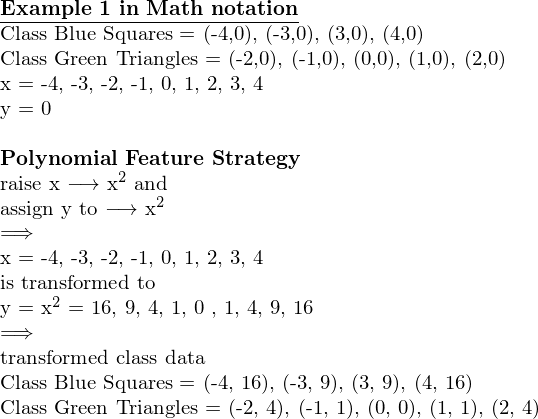

In [4]:
img = os.path.join(path, 'static/images/nonlinear_example1.png')
Image(filename=img) 

<div id="image1">
</div>

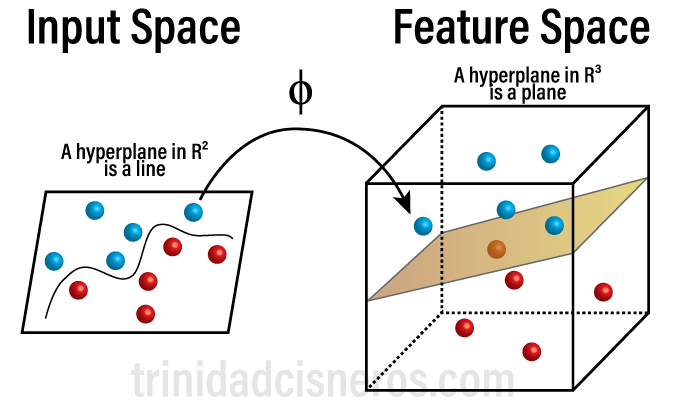

In [5]:
img = os.path.join(path, 'static/images/image1.png')
Image(filename=img) 

<hr style="border-top: 5px solid black;">

<div id="objective2" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out Nonlinear SVM classification using <code>PolynomialFeatures</code> and <code>LinearSVC</code> with the <code>make_moons</code> dataset.</font></h1></center>
    <ul>
        <li>The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html"><code>make_moons</code></a> dataset is a toy dataset use in binary classification problems.</li><br>
        <li>The dataset uses <a href="random sample generators that can be used to build artificial datasets of controlled size and complexity.">Generated datasets</a>, which in this case, is used to make two interleaving half circles.</li><br>
        <li>Sklearn Generated datasets have single label and multilabel datasets.</li><br>
        <li>There are two datasets for the single label cases.
            <ol>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs"><code>make_blobs</code></a></li>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification"><code>make_classification</code></a></li>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs"><code>make_blobs</code></a></li>
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles"><code>make_circles</code></a></li> 
                <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons"><code>make_moons</code></a></li>                 
            </ol>
        </li><br>
        <li>Both <code>make_circles</code> and <code>make_moons</code> generate 2d binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise, and are great for visualisation .</li><br>
        <li><code>make_circles</code> produces Gaussian data with a spherical decision boundary for binary classification, while <code>make_moons</code> produces two interleaving half circles.</li><br>
        <li>This post will use <code>make_moons</code> to illustrate the principle of polynomial features and linearSVC in nonlinear SVM classificaiton.</li><br>
        <hr>
        <li><h2>The <code>make_moons</code> dataset explained</h2></li><br>
        <li><strong><code>sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)</code></strong> Parameters Explained:
            <ul>
                <li><strong><code>n_samples (int or tuple of shape (2,), dtype=int, default=100)</code></strong>: If int, the total number of points generated. If two-element tuple, number of points in each of two moons.</li>
                <li><strong><code>shuffle (bool, default=True)</code></strong>: Whether to shuffle the samples</li>
                <li><strong><code>noise (float, default=None)</code></strong>: Standard deviation of Gaussian noise added to the data./li>
                <li><strong><code>random_state (int, RandomState instance or None, default=None)</code></strong>: Determines random number generation for dataset shuffling and noise. Pass an int for reproducible output across multiple function calls</li>
            </ul>
        </li><br>
        <li>What this class returns:
            <ul>
                <li><strong><code>X (ndarray of shape (n_samples, 2))</code></strong>: The generated samples.</li>
                <li><strong><code>y ndarray of shape (n_samples,)</code></strong>: The integer labels (0 or 1) for class membership of each sample.</li>
            </ul>
        </li><br>
        <li><strong>import code:</strong> <code>from sklearn.datasets import make_moons</code></li><br>
    </ul>
    <hr>
    <ul><h2>Methods Overiew</h2>
        <li>A sample of 100 data points classified into two groups was generated from <code>make_moons</code> </li>
        <li>As can see in <a href="#example2a">Make moons data example</a>, the data contains two classes that swirl together (look like crescent moons), and would not be linearly separable using standard linear SVM classification. The data would need to be transformed.</li>
        <li>We tranform the moons data <a href="#example2b">Polynomial Features, StandardScaler</a> and then apply , LinearSVC on the data.</li>
        <li>In this block of code we combine several steps using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Sklearn Pipeline</a>,which assemble several steps that can be cross-validated together while setting different parameters. It makes it easier to code.</li>
        <li>The first step in the pipeline is the <code>PolynomialFeatures</code>, where we set the <code>degrees</code> parameter = 3. So we map data into a cubic function.</li>
        <li>The second step in the pipeline is the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> method, which This method will standardize features by removing the mean and scaling to unit variance <code>z = (x - u) / s</code>.</li>
        <li>Linear SVM is sensitive to feature scaling, so this is a standard step you should include in your workflow.</li>
        <li>The final step in the pipeline is the <code>LinearSVC(C=10, loss="hinge", max_iter = 5000, random_state=42)</code> method.</li>
        <li>The last steps sets the <code>C</code> parameter to 10, which is higher than the default value, this makes the classification more rigid (less margin violations and misclassification of data).</li>
        <li>The <code>loss</code> paramater is set to hinge, wish is the loss function commonly used in SVM.</li>
        <li>The <code>max_iter</code> paramater is set to 5000, to provide sufficient ireration during the training set.</li>
        <li>The <code>random_state</code> paramater is set to 42, which is a number used to ensure runs have the same random starting point.</li>
        <li>Once the model has been trained, we then plot the data using a custom function that takes in our trained model, and a given axis</li>
    </ul>
</div>

<div id="example2a"><strong>Make Moons Data</strong>
</div>

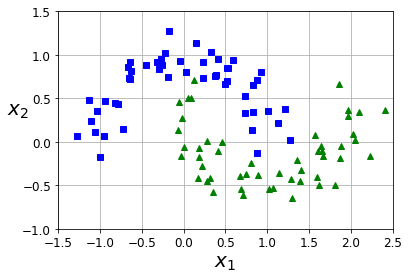

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<div id="example2b"><strong>Apply polynomial features on moons dataset</strong>
</div>

In [7]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter = 5000, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=5000,
                           random_state=42))])

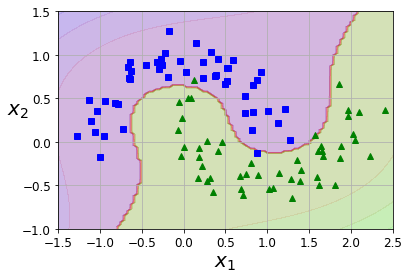

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>Notice that the non linear data can now be distinguished, and most of the classes are well classified.</li><br>
        <li>The data looks identical to our plot before we carried out our nolinear SVM classification, and that is because it is still the same data. What we did was used the transformed data (polynomial features) with our LinearSVC altogirthm.  This then allowed us to classify our data that was non linear!, we then drew a decision boundary between them.</li>       
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective3" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Demonstrate how to carry out Nonlinear SVM classification using <code>PolynomialFeatures</code> and <code>LinearSVC</code> with nfl player data.</font></h1></center>
    <ul>
        <li>NFL data was obtained from <a href="https://sportsdata.io/">SportDataIO</a> and loaded into Pandas dataframe. A guide to making an API call to SportDataIO can be obtained in <a href="https://trinidadcisneros.com/folders/python/python_sportsdataio_api.html">A quick and easy guide to make a SportsDataIO API call and load data to Pandas.</a> post.</li>
        <li>The data consists of players, their weights, heights, and position.</li>
        <li>The goal is to classify players' position based on their weight and height.</li>
        <li>There are various positions, but two were selected for this example.</li>
        <li>The same methods used in the moons dataset were applied to this dataset.</li>     
    </ul>
</div>

In [9]:
# Files
nfl_file = 'static/data/nfl_df.csv'
nfl_abbreviation_file = 'static/data/nfl_abbr.csv'

# Import into pandas dataframe
nfl_df = pd.read_csv(nfl_file)
nfl_abbr = pd.read_csv(nfl_abbreviation_file)

# Merge dataframes
merged_df = nfl_df.merge(nfl_abbr, on ='Position')

# Rearrange columns
merged_df = merged_df[['PlayerID', 'ShortName', 'Team', 'Position', 'Position Title', 'Height_in', 'Weight_lbs', 'PhotoUrl']]

# Dataframe 1 (Offensive Lineman and Cornerback)
group=['Punter', 'Inside Linebacker']
df = merged_df.loc[merged_df['Position Title'].isin(group)].reset_index(drop=True)
df["target"] = np.where(df['Position Title'] == 'Punter', 1, 0)  # add target column
# remove a group of outliers
df = df[df['Height_in'] > 65]

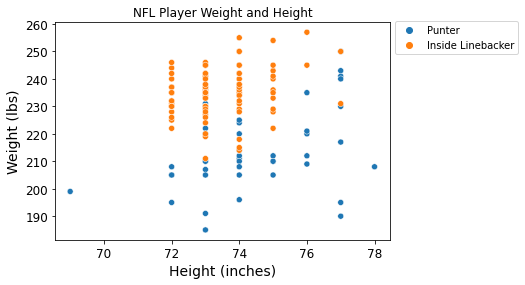

In [10]:
# plot actual nfl player data
sns.scatterplot(x='Height_in',y='Weight_lbs', data=df, hue='Position Title')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.title('NFL Player Weight and Height')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.93))
plt.show()

In [11]:
# Prepare parameters
X = df[['Height_in','Weight_lbs']].to_numpy()  # converts to 2d numpy array
y = df.target.to_numpy()

In [12]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter = 10000, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=10000,
                           random_state=42))])

In [13]:
# Outside Linebacker test
test1= polynomial_svm_clf.predict([[74, 240]])

# Offensive punter test
test2= polynomial_svm_clf.predict([[74, 210]])

print(f'test1: {test1}\ntest2: {test2}')

test1: [0]
test2: [1]


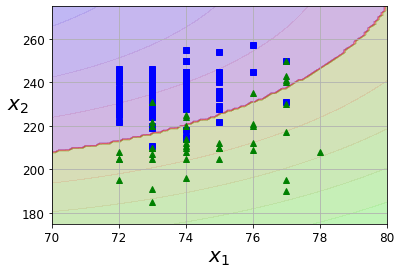

In [14]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [70, 80, 175, 275])
plot_dataset(X, y, [70, 80, 175, 275])

plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Comments</font></h2></center>
    <ul>
        <li>The data for both classes initially clustered tightly, but the model was able to separate the classes, with some misclassifications.</li><br>
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
<center><h2><br><font color="blue">Final Thoughts</font></h2></center>
    <ul>
 <li><mark style="background-color: yellow;">The objective of this post is to discuss nonlinear support vector machine classification, which seeks to a) transform nonlinear data into a linear format, and b) identify a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.</mark></li><br>
        <li>We used PolynomialFeatures and LinearSVC to accomplish this goal, and carried out this step in Python for an artifical dataset and a real dataset.</li><br>
        <li><font color="red">This post focused on a simple Nonlinear SVM Classification problem, in more complex datasets, Kernel functions are commonly used, and are a lot more powerful.</font></li><br>     
    </ul>
</div>